In [1]:
import os
import pickle as pickle
import tensorflow as tf
import numpy as np
from Simulation import buffer_simulation, save_obj, load_obj
import pandas as pd
from datetime import datetime
from pandas import ExcelWriter
from openpyxl import Workbook
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import matplotlib.ticker as ticker
from pylab import *
from IPython.display import display,HTML
import cufflinks as cf
import plotly.offline as py
from pandas import ExcelWriter
from openpyxl import Workbook

In [2]:
datos  = pd.read_excel('MoRS\Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Grafics_correccion_VBW.xlsx',sheet_name='graficar')
tabla= datos.set_index("Voltajes")
tabla
df_tabla = pd.DataFrame(tabla)
df_tabla

,E,FlipPatch,% Fallos,Unnamed: 4,Unnamed: 5,Fallos,Unnamed: 7
Voltajes,,,,,,,
0.51,0.144141,0.147309,55.900000,NaN,NaN,739940,586153.9840
0.52,0.151738,0.389495,23.790000,NaN,NaN,265238,249456.2304
0.53,0.331850,0.636760,6.700000,NaN,1048576.0,72408,70254.5920
0.54,0.585180,0.982999,1.110000,NaN,NaN,11817,11639.1936
0.55,0.645479,1.000000,0.304317,NaN,NaN,3191,NaN
0.56,0.712090,1.000000,0.107384,NaN,NaN,1126,NaN
0.57,0.844462,1.000000,0.032139,NaN,NaN,337,NaN
0.58,0.999558,1.000000,0.005341,NaN,NaN,56,NaN
0.59,0.999558,1.000000,0.000572,NaN,NaN,6,NaN


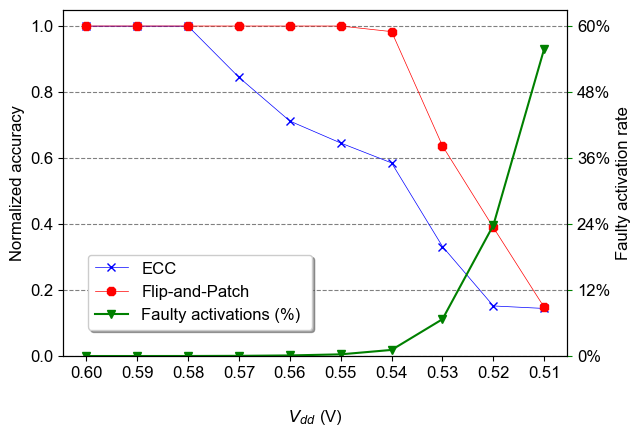

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

In [4]:
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as patches
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from matplotlib.patches import Rectangle

plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

#from datetime import datetime
import time




l='0.5'
marksize=6

x=datos["Voltajes"]
y1 = 0.05 * x**2
y2 = 1 *y1


#plt.rcParams.update({'font.size': 15})
fig1, ax1 = plt.subplots(figsize=(6.5,4.5))
#x_rect = 0.5
#y_rect = 0.5
#width_rect =0.5
#height_rect = 0.1
#
## Crear el cuadro transparente en el primer eje
#rect = plt.Rectangle((x_rect, y_rect), width_rect, height_rect, linewidth=1, edgecolor='g', facecolor='none', alpha=0.5)
#
## Agregar el cuadro al primer eje
#ax1.add_patch(rect)

ax2 = ax1.twinx()





#ax1= fig.add_subplot(1,3,1)
x_values = range(len(x))


#plt.ylabel('Normalized accuracy', fontsize=12,  fontfamily="serif")

#ax1.yaxis.set_label_position("left")
#ax1.yaxis.tick_left()
#ax2.yaxis.set_label_position("right")
ax1.set_ylabel('Normalized accuracy')
ax2.set_ylabel('Faulty activation rate')
ax1.set_xlabel("$V_{dd}$ (V)")
ax1.xaxis.set_label_coords(0.5, -0.15)
#ax2.yaxis.tick_right()


ax1.set_xticks([0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60]) 
#ax2.set_yticks(labelsize=12,fontfamily="serif") 

#ax1.tick_params(axis="x",labelsize=12,fontfamily="serif") 
#plt.xticks(x, tabla.index, fontsize= 12, fontfamily="serif" )

#ax2.set_ylim(0,  8.1)
ax1.set_ylim(0,1.05)



#ax1.set_title(" ECC vs Baseline SqueezeNet")
ax1.invert_xaxis()

#mport matplotlib.pyplot as plt
import matplotlib.patches as patches

#fig, ax = plt.subplots()

#ax1.plot([1, 4], [1, 4])



ax1.plot(tabla["E"], label='ECC', color='b', ls='-', lw=l, marker='x', markersize=marksize)
ax1.plot(tabla["FlipPatch"], label='Flip-and-Patch', color='r', ls='-', lw=l, marker='8', markersize=marksize)
Extra=ax2.plot(tabla["% Fallos"] ,label='Faulty activations (%) ', color='g', ls='-',marker='v', markersize=marksize )
#ax1.plot(tabla["FlipPatch_0.53"], label='FlipPatch 0.53 V', color="b", ls='-', lw=l, marker='x', markersize=marksize)
#ax1.plot(tabla["FlipPatch_0.54"], label='FlipPatch 0.54 V', color="r", ls='-', lw=l, marker='8', markersize=marksize)
#ax1.grid(axis='y', color = 'gray', linestyle = 'dashed')
#ax1.grid(axis='x', color = 'gray', linestyle = 'dashed')
# Definir las coordenadas del cuadro y su tamaño



ax1.yaxis.grid(color='gray', linestyle='dashed')
#ax2.yaxis.grid(color='g', linestyle='dashed')



def porcentaje_formatter(x, pos):
    return f'{x:.0f}%'

# Aplicar la función de formateo al eje y
formatter = FuncFormatter(porcentaje_formatter)
ax2.yaxis.set_major_formatter(formatter)
#line1.set_marker(None)
ax2.tick_params(axis='y', color='g')
#legend1= ax2.legend(handles=[Extra],loc='lower right',labels=[],handlelength=0, handleheight=25.5,facecolor='lightsteelblue')
custom_legend = [Line2D([], [])]
#legend1= ax2.legend(custom_legend, [''],handles=[Extra],loc='lower right',labels=[],handlelength=0,
#                    handleheight=24,fancybox=True, framealpha=0.2,frameon=True,borderpad=1.8,bbox_to_anchor=(0.99,-0.01))
#
#
##borderpad=1.3
#
#
#
#
## Agregar texto personalizado a la leyenda
#
#texto_personalizado = "Ultra-low\n    $V_{dd}$ "
#texto_obj = legend1.texts[0]
#texto_obj.set_text(texto_personalizado)
#texto_obj.set_position((-3, 75))
#texto_obj.set_fontsize(12)
##texto_obj.set_color('cyan')
#
## Añadir contorno a la leyenda
#legend1.get_frame().set_edgecolor('black')  # Color del contorno
#legend1.get_frame().set_linewidth(1.5)  # Grosor del contorno
#
#
#
#
#    
fig1.legend(fontsize=12,bbox_to_anchor=(0.15,0.15),loc ="lower left", shadow = True)
#
#for legend_handle in legend1.legendHandles:
    #legend_handle.set_alpha(0.0)  
ax2.set_ylim(0,63)
#ax2.xticks(np.arange(0, 60, 12))
ax2.set_yticks(np.arange(0, 63, 12))





plt.savefig('Acc_by_fault_rate_mod.png', transparent = True, bbox_inches = 'tight', pad_inches = 0)
plt.show()
#
plt.tight_layout()





plt.show

In [360]:
pwd

'C:\\Users\\usuario\\Desktop\\CNN_Gating'

In [361]:
from PIL import Image

im = Image.open("Acc_by_fault_rate_mod.jpg")


FileNotFoundError: [Errno 2] No such file or directory: 'Acc_by_fault_rate_mod.jpg'

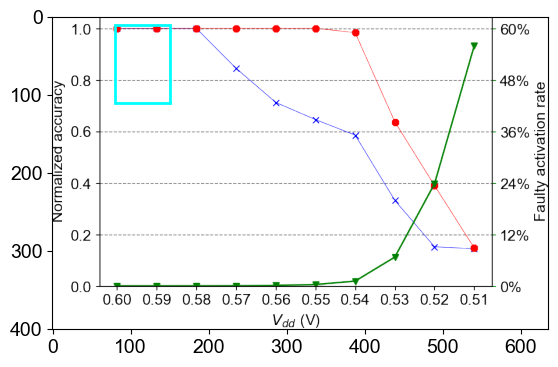

In [362]:
from PIL import Image

im = Image.open("Acc_by_fault_rate_mod.png")

plt.imshow(im)

ax = plt.gca()

rect = patches.Rectangle((80, 10), 70, 100, linewidth=2, edgecolor="cyan", fill=False)

ax.add_patch(rect)

plt.show()

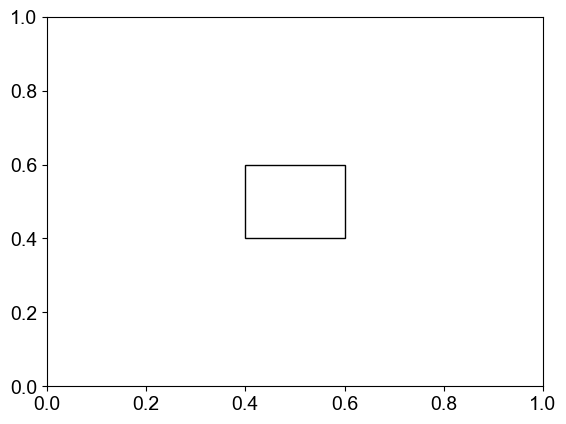

In [344]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

someX, someY = 0.5, 0.5
plt.figure()
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((someX - .1, someY - .1), 0.2, 0.2, fill=None, alpha=1))
plt.show()

In [129]:
import pandas as pd
acc_by_tech=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols_correccion_VBW.xlsx',sheet_name='Hoja2', usecols=["Redes","Tecnic" ,"0.53 V","0.52 V","0.51 V"])
acc_by_tech= acc_by_tech.set_index("Tecnic")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
#acc_by_tech
#df = pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols.xlsx',sheet_name='Hoja2')
df = pd.DataFrame(acc_by_tech)
# Extraer los datos de la columna 'Columna1'
#Tecnic = df['Tecnic']
#Redes  = df['Redes']
#columnas_seleccionadas = df.iloc[ [2, 3, 4]]  
#ACC=df["0.53 V","0.52 V","0.51 V"]
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])
acc_by_tech

,Redes,0.51 V,0.52 V,0.53 V
Tecnic,,,,
Base,Alex,0.149102,-0.012575,0.069012
FaP,NaN,0.197904,0.509281,0.294311
SaS,NaN,0.985629,0.010778,0.002545
Base,Dense,0.128467,0.000000,0.004088
FaP,NaN,0.128467,0.762628,0.108759
SaS,NaN,0.983066,0.011679,0.005110
Base,Mobile,0.137670,0.001513,0.000000
FaP,NaN,0.139183,0.061725,0.636006
SaS,NaN,0.966415,0.016641,0.009834


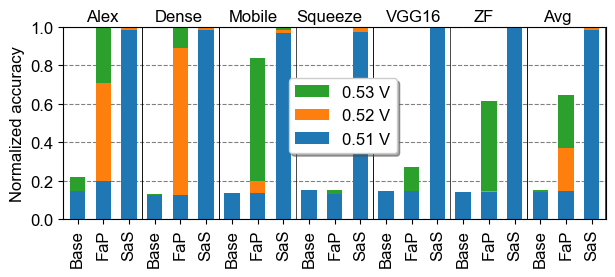

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile

plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

plt.rcParams['axes.titlesize'] = 12  # Tamaño del título de los ejes
plt.rcParams['axes.labelsize'] = 12 # Tamaño de las etiquetas de los ejes
plt.rcParams['legend.fontsize'] = 12  # Tamaño de la fuente de las leyendas
plt.rcParams['xtick.labelsize'] = 12  # Tamaño de las etiquetas del eje x
plt.rcParams['ytick.labelsize'] = 12  # Tamaño de las etiquetas del eje y




n = len(acc_by_tech.index)
#fig= plt.figure()

#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,1,6)
#coloresRedes = ['green', 'red','dodgerblue']
#coloresRedes = ['#ff7f0e', 'green','dodgerblue']
#coloresRedes = ['#ffbb78', '#1f77b4','#7f7f7f']
coloresRedes = ['#1f77b4','#ff7f0e', '#2ca02c' ]
#coloresRedes = ['#d62728', '#2ca02c', '#9467bd']

#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

bars=acc_by_tech.plot(kind ='bar' ,stacked = True,width = 0.60, color = coloresRedes, figsize=(7,2.5), zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Normalized accuracy')
plt.xticks(x, acc_by_tech.index )
#plt.legend(  fontsize=12,loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0,1)
#bars.set_ylim(bottom=0, top=3)

plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')
#plt.xticks([])




handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
legend1=plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc ="lower left",
           bbox_to_anchor=(0.4,0.3),shadow = True)

#plt.legend(fontsize=14,loc ="lower left", shadow = True)
#["0.58","0.56","0.54"]



#plt.axhline(y=50, color='r', linestyle='--')
#plt.axhline(y=1, color='red', linestyle='-', label='0.54 V')

#plt.text(15, 0.86, '0.54 V', fontsize=14, fontfamily="serif",color="red")
#plt.axhline(y=1, color="red",linestyle='-',linewidth=6,label='0.54 V')#Alex


#plt.text(2.4, -0.046, '|',fontweight='ultralight')
#plt.text(5.4, -0.046, '|',fontweight='ultralight')
#plt.text(8.4, -0.046, '|',fontweight='ultralight')
#plt.text(11.4, -0.046, '|',fontweight='ultralight')
#plt.text(14.4, -0.046, '|',fontweight='ultralight')
#plt.text(17.4, -0.046, '|',fontweight='ultralight')

plt.axvline(x=2.5, ymax= 1, color="black", linewidth=0.5)
plt.axvline(x=5.5, ymax= 1, color="black", linewidth=0.5)
plt.axvline(x=8.5, ymax= 1, color="black", linewidth=0.5)
plt.axvline(x=11.5, ymax= 1, color="black", linewidth=0.5)
plt.axvline(x=14.5, ymax= 1, color="black", linewidth=0.5)
plt.axvline(x=17.5, ymax= 1, color="black", linewidth=0.5)







plt.text(0.32, 1.03, 'Alex')
plt.text(3, 1.03, 'Dense')
plt.text(5.9, 1.03, 'Mobile' )
plt.text(8.5,1.03, 'Squeeze')
plt.text(12.0, 1.03, 'VGG16')
plt.text(15.4, 1.03, 'ZF')
plt.text(18.1, 1.03, 'Avg')

#plt.text(0.34, -0.4, 'AlexNet', fontsize=14, fontfamily="serif")
#plt.text(3.2, -0.18, 'DenseNet', fontsize=14, fontfamily="serif")
#plt.text(6.2, -0.18, 'MobileNet', fontsize=14, fontfamily="serif")
#plt.text(9.,-0.18, 'SqueezeNet', fontsize=14, fontfamily="serif")
#plt.text(12.45, -0.18, 'VGG16', fontsize=14, fontfamily="serif")
#plt.text(15.5, -0.18, 'ZFNet', fontsize=14, fontfamily="serif")
#plt.text(18.7, -0.18, 'Avg', fontsize=14, fontfamily="serif")
#
#plt.text(-0.69, -0.073, '|', fontsize=20, fontweight='ultralight')
#plt.text(2.4, -0.073, '|', fontsize=20, fontweight='ultralight')
#plt.text(5.4, -0.073, '|', fontsize=20, fontweight='ultralight')
#plt.text(8.4, -0.073, '|', fontsize=20, fontweight='ultralight')
#plt.text(11.4, -0.073, '|', fontsize=20, fontweight='ultralight')
#plt.text(14.4, -0.073, '|', fontsize=20, fontweight='ultralight')
#plt.text(17.4, -0.073, '|', fontsize=20, fontweight='ultralight')
#plt.text(20.4, -0.073, '|', fontsize=20, fontweight='ultralight')



#legend2 = plt.legend(['0.54 V'], loc ="lower left",fontsize=14,bbox_to_anchor=(1,0.89))
#custom_legend = [Line2D([0], [0], color='red', lw=1.7, label='0.54 V')]
#plt.legend(handles=custom_legend, loc ="lower left",fontsize=14,bbox_to_anchor=(1,0.875),shadow = True)
#plt.gca().add_artist(legend1)
plt.axvline(x=2.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#Dense
#plt.axvline(x=8.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#mobil
#plt.axvline(x=14.5, ymax= 5, color="black",linewidth=0.5)#res
plt.axvline(x=17.5, ymax= 5, color="black",linewidth=0.5)#sque
plt.axvline(x=20.5, ymax= 5, color="black",linewidth=0.5)#vgg16
#plt.axvline(x=23.5, ymax= 5, color="black",linewidth=0.5)#vgg19
#plt.axvline(x=26.5, ymax= 5, color="black",linewidth=0.5)#xcep
plt.axvline(x=29.5, ymax= 5, color="black",linewidth=0.5)#zf
plt.savefig('Mors_acc_by_tech_modif.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)

## Energy

In [3]:
import pandas as pd
Energia_Mors=pd.read_excel('MoRS/Analisis_Resultados/Energía_VBW/final_prestaciones_energia_SaS.xlsx',sheet_name='energy', usecols=["Redes","TUV", "FaP" ,"SaS-0.53","SaS-0.52","SaS-0.51"])
Energia_Mors= Energia_Mors.set_index("Redes")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
#acc_by_tech
#df = pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols.xlsx',sheet_name='Hoja2')
df = pd.DataFrame(Energia_Mors)
# Extraer los datos de la columna 'Columna1'
#Tecnic = df['Tecnic']
#Redes  = df['Redes']
#columnas_seleccionadas = df.iloc[ [2, 3, 4]]  
#ACC=df["0.53 V","0.52 V","0.51 V"]
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])
Energia_Mors

,TUV,FaP,SaS-0.53,SaS-0.52,SaS-0.51
Redes,,,,,
Alex,0.949003,0.939779,0.917858,0.881082,0.873377
Dense,0.934605,0.935519,0.925599,0.914828,1.199131
Mobile,0.973134,0.935983,0.919876,0.895176,1.021598
Squeeze,0.966081,0.935377,0.918434,0.892850,1.007563
VGG16,0.974327,0.940426,0.917565,0.878725,0.848542
ZF,0.955994,0.940103,0.917820,0.880127,0.862993
Avg,0.958857,0.937864,0.919525,0.890465,0.968867


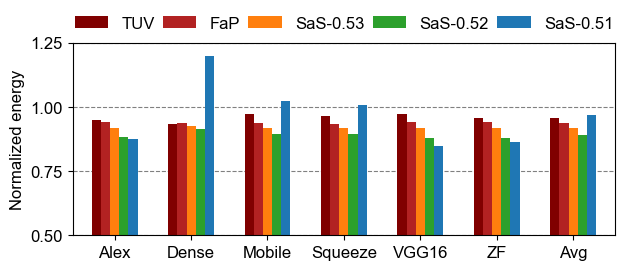

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile


plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

plt.rcParams['axes.titlesize'] = 12  # Tamaño del título de los ejes
plt.rcParams['axes.labelsize'] = 12 # Tamaño de las etiquetas de los ejes
plt.rcParams['legend.fontsize'] = 12  # Tamaño de la fuente de las leyendas
plt.rcParams['xtick.labelsize'] = 12  # Tamaño de las etiquetas del eje x
plt.rcParams['ytick.labelsize'] = 12  # Tamaño de las etiquetas del eje y

n = len(Energia_Mors.index)
x = np.arange(n)
coloresRedes = ['#800000','#B22222','#ff7f0e', '#2ca02c','#1f77b4', ]
#coloresRedes = [ 'gold','springgreen','lime','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(15,5), dpi=100)

bars=Energia_Mors.plot(kind ='bar' ,stacked = False,width = 0.60, color = coloresRedes,figsize=(7,2.5), zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Normalized energy')
plt.xticks(x, Energia_Mors.index )

lg = plt.legend(  loc ="center", bbox_to_anchor=(0.5,1.1),shadow = True, ncol=5, columnspacing=0.5)
lg.draw_frame(False)
#plt.legend(  loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0.5,1.25)
#bars.set_ylim(bottom=0, top=3)
plt.yticks(np.arange(0.5, 1.26, step=0.25))
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

#plt.xlabel('', fontsize=12)
plt.xlabel('')
#plt.xticks([])

plt.grid(axis='y', color = 'gray', linestyle = 'dashed')


#plt.text(1.45, -0.046, '|', fontsize=12, fontfamily="serif")
#plt.text(3.45, -0.046, '|', fontsize=12, fontfamily="serif")
#plt.text(5.45, -0.046, '|', fontsize=12, fontfamily="serif")
#plt.text(7.45, -0.046, '|', fontsize=12, fontfamily="serif")
#plt.text(9.45, -0.046, '|', fontsize=12, fontfamily="serif")
#plt.text(11.5, -0.046, '|', fontsize=12, fontfamily="serif")
#
#plt.axvline(x=1.5, ymax= 1, color="black", linewidth=0.5)
#plt.axvline(x=3.5, ymax= 1, color="black", linewidth=0.5)
#plt.axvline(x=5.5, ymax= 1, color="black", linewidth=0.5)
#plt.axvline(x=7.5, ymax= 1, color="black", linewidth=0.5)
#plt.axvline(x=9.5, ymax= 1, color="black", linewidth=0.5)
#plt.axvline(x=11.5, ymax= 1, color="black", linewidth=0.5)


#plt.text(0.08, -0.30, 'Alex', fontsize=18, fontfamily="arial")
#plt.text(1.7, -0.30, 'Dense', fontsize=18, fontfamily="arial")
#plt.text(3.6, -0.30, 'Mobile', fontsize=18, fontfamily="arial")
#plt.text(5.5,-0.30, 'Squeeze', fontsize=18, fontfamily="arial")
#plt.text(7.9, -0.30, 'VGG', fontsize=18, fontfamily="arial")
#plt.text(10.1, -0.30, 'ZF', fontsize=18, fontfamily="arial")
#plt.text(12, -0.30, 'Avg', fontsize=18, fontfamily="arial")
plt.savefig('energia_Mors_JSA.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)



# Time

In [318]:
import pandas as pd
time_Mors=pd.read_excel('MoRS/Analisis_Resultados/Energía_VBW/final_prestaciones_energia_SaS.xlsx',sheet_name='time_ex', usecols=["Redes","FaP" ,"SaS-0.53","SaS-0.52","SaS-0.51"])
time_Mors= time_Mors.set_index("Redes")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
#acc_by_tech
#df = pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/Acc_by_technique_all_vols.xlsx',sheet_name='Hoja2')
df = pd.DataFrame(time_Mors)
# Extraer los datos de la columna 'Columna1'
#Tecnic = df['Tecnic']
#Redes  = df['Redes']
#columnas_seleccionadas = df.iloc[ [2, 3, 4]]  
#ACC=df["0.53 V","0.52 V","0.51 V"]
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])
time_Mors

,FaP,SaS-0.53,SaS-0.52,SaS-0.51
Redes,,,,
Alex,1.000004,1.001464,1.004950,1.044329
Dense,1.000070,1.015102,1.050106,1.454449
Mobile,1.000050,1.008055,1.026209,1.232786
Squeeze,1.000026,1.007128,1.024313,1.217550
VGG16,1.000012,1.000457,1.001544,1.014068
ZF,1.000006,1.001072,1.003489,1.031549
Avg,1.000028,1.005546,1.018435,1.165788


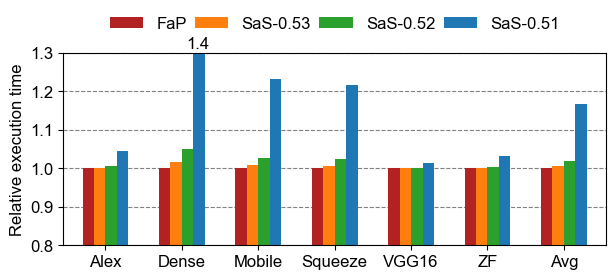

In [328]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile


plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

plt.rcParams['axes.titlesize'] = 12  # Tamaño del título de los ejes
plt.rcParams['axes.labelsize'] = 12 # Tamaño de las etiquetas de los ejes
plt.rcParams['legend.fontsize'] = 12  # Tamaño de la fuente de las leyendas
plt.rcParams['xtick.labelsize'] = 12  # Tamaño de las etiquetas del eje x
plt.rcParams['ytick.labelsize'] = 12  # Tamaño de las etiquetas del eje y

n = len(time_Mors.index)
x = np.arange(n)
coloresRedes = ['#B22222','#ff7f0e', '#2ca02c','#1f77b4', ]
#coloresRedes = [ 'gold','springgreen','lime','mediumseagreen', 'darkgreen']
#fig = plt.figure(figsize=(15,5), dpi=100)

bars=time_Mors.plot(kind ='bar' ,stacked = False,width = 0.60, color = coloresRedes,figsize=(7,2.5), zorder=2)
#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Relative execution time')
plt.xticks(x, time_Mors.index )

lg = plt.legend(  loc ="center", bbox_to_anchor=(0.5,1.15),shadow = True, ncol=4, columnspacing=0.5)
lg.draw_frame(False)
#plt.legend(  loc ="center right",bbox_to_anchor=(0.,0.45), shadow = True)
plt.ylim(0.8,1.30)
#bars.set_ylim(bottom=0, top=3)
plt.yticks(np.arange(0.8, 1.31, step=0.1))
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

#plt.xlabel('', fontsize=12)
plt.xlabel('')
#plt.xticks([])

plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
plt.text(1.06, 1.31, '1.4')
#plt.text(1.45, -0.046, '|', fontsize=12, fontfamily="serif")
#plt.text(3.45, -0.046, '|', fontsize=12, fontfamily="serif")
#plt.text(5.45, -0.046, '|', fontsize=12, fontfamily="serif")
#plt.text(7.45, -0.046, '|', fontsize=12, fontfamily="serif")
#plt.text(9.45, -0.046, '|', fontsize=12, fontfamily="serif")
#plt.text(11.5, -0.046, '|', fontsize=12, fontfamily="serif")
#
#plt.axvline(x=1.5, ymax= 1, color="black", linewidth=0.5)
#plt.axvline(x=3.5, ymax= 1, color="black", linewidth=0.5)
#plt.axvline(x=5.5, ymax= 1, color="black", linewidth=0.5)
#plt.axvline(x=7.5, ymax= 1, color="black", linewidth=0.5)
#plt.axvline(x=9.5, ymax= 1, color="black", linewidth=0.5)
#plt.axvline(x=11.5, ymax= 1, color="black", linewidth=0.5)


#plt.text(0.08, -0.30, 'Alex', fontsize=18, fontfamily="arial")
#plt.text(1.7, -0.30, 'Dense', fontsize=18, fontfamily="arial")
#plt.text(3.6, -0.30, 'Mobile', fontsize=18, fontfamily="arial")
#plt.text(5.5,-0.30, 'Squeeze', fontsize=18, fontfamily="arial")
#plt.text(7.9, -0.30, 'VGG', fontsize=18, fontfamily="arial")
#plt.text(10.1, -0.30, 'ZF', fontsize=18, fontfamily="arial")
#plt.text(12, -0.30, 'Avg', fontsize=18, fontfamily="arial")
plt.savefig('performance.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)



In [1]:
import pandas as pd
acc_low_and_high=pd.read_excel('MoRS/Analisis_Resultados/Acc_Redes_time/Mors_Grafics/ACC_tipo_palabras_tecnicas.xlsx',sheet_name='grafic_less_VBW', usecols=["Tecnic" ,"0.53 V","0.52 V","0.51 V"])
acc_low_and_high= acc_low_and_high.set_index("Tecnic")
#acc_low_and_high=acc_low_and_high.reindex(columns=["Tecnic" ,"0.58 V","0.56 V","0.54 V"])
acc_low_and_high
#Resumen=pd.read_excel('Analizando_fichero_detalle/Alterado_fichero/Resumen_x2_x3_4.xlsx',sheet_name='base', usecols=["redes","Original","Base", "base_Volt", "ECC","1bytex","ECC_base_x4"])


,0.51 V,0.52 V,0.53 V
Tecnic,,,
L&H,0.209581,0.547904,0.243413
L+f(H),0.966879,0.024139,0.009581
L&H,0.128467,0.818978,0.053431
L+f(H),0.997993,0.002591,0.002190
L&H,0.139183,0.086233,0.688956
L+f(H),0.813540,0.028215,0.145991
L&H,0.131805,0.000000,0.033095
L+f(H),0.131805,0.006447,0.858883
L&H,0.145695,0.000000,0.127815


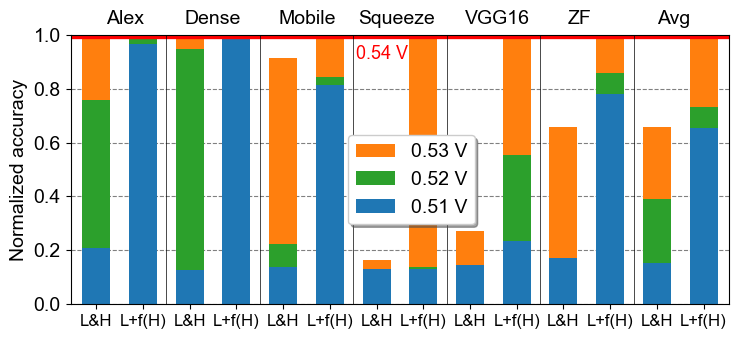

In [334]:
plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'sans-serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

plt.rcParams['axes.titlesize'] = 14  # Tamaño del título de los ejes
plt.rcParams['axes.labelsize'] = 14 # Tamaño de las etiquetas de los ejes
plt.rcParams['legend.fontsize'] = 14  # Tamaño de la fuente de las leyendas
plt.rcParams['xtick.labelsize'] = 14  # Tamaño de las etiquetas del eje x
plt.rcParams['ytick.labelsize'] = 14  # Tamaño de las etiquetas del eje y

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
n = len(acc_low_and_high.index)
#fig= plt.figure()

#usecols=["0.54","0.56","0.58"]
x = np.arange(n)
#y = np.linspace(0,1,6)
#coloresRedes = ['green', 'red','dodgerblue']
#coloresRedes = ['#ff7f0e', 'green','dodgerblue']
#coloresRedes = ['#ffbb78', '#1f77b4','#7f7f7f']
coloresRedes = ['#1f77b4', '#2ca02c', '#ff7f0e']
#coloresRedes = ['#d62728', '#2ca02c', '#9467bd']
#fig = plt.figure(figsize=(10,5), dpi=100)
#plt.yticks([y,acc])

#hatch_s=['///','...', 'xx']
#
#bars = plt.bar(x, y)

#plt.bar(acc_low_and_high,stacked=True,width = 0.50, fontsize=8, color = coloresRedes,
                             #zorder=2)

acc=acc_low_and_high.plot(kind ='bar' ,stacked = True,width = 0.60, color = coloresRedes,
                          figsize=(8.5,3.5),  zorder=2)

#for i in range(len(bars)):
#    bars[i].set(hatch = hatches[i], fill=False)

plt.ylabel('Normalized accuracy', )
plt.xticks(x, acc_low_and_high.index, )
#plt.legend(  fontsize=12,loc ="center right",bbox_to_anchor=(1.0,0.45), shadow = True)
plt.ylim(0,1)
#bars.set_ylim(bottom=0, top=3)

plt.xticks(rotation = 0,fontsize=12)
plt.yticks(rotation = 0)
plt.grid(axis='y', color = 'gray', linestyle = 'dashed')
#plt.xlabel('', fontsize=12)
plt.xlabel('')



handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [2,1,0]
#add legend to plot
legend1=plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc ="lower left",
           bbox_to_anchor=(0.407,0.26),shadow = True)

#plt.legend(fontsize=14,loc ="lower left", shadow = True)
#["0.58","0.56","0.54"]


plt.text(0.2, 1.04, 'Alex')
plt.text(1.9, 1.04, 'Dense')
plt.text(3.9, 1.04, 'Mobile' )
plt.text(5.6,1.04, 'Squeeze')
plt.text(7.9, 1.04, 'VGG16')
plt.text(10.1, 1.04, 'ZF')
plt.text(12.0, 1.04, 'Avg')

#plt.axhline(y=50, color='r', linestyle='--')
#plt.axhline(y=1, color='red', linestyle='-', label='0.54 V')

plt.text(5.55, 0.91, '0.54 V',fontsize=13, color="red")
plt.axhline(y=1, color="red",linestyle='-',linewidth=6,label='0.54 V')#Alex
#legend2 = plt.legend(['0.54 V'], loc ="lower left",fontsize=14,bbox_to_anchor=(1,0.89))
#custom_legend = [Line2D([0], [0], color='red', lw=1.7, label='0.54 V')]
#plt.legend(handles=custom_legend, loc ="lower left",fontsize=14,bbox_to_anchor=(1,0.875),shadow = True)
#plt.gca().add_artist(legend1)
plt.axvline(x=1.5, ymax= 5, color="black",linewidth=0.5)#Alex
plt.axvline(x=3.5, ymax= 5, color="black",linewidth=0.5)#Dense
plt.axvline(x=5.5, ymax= 5, color="black",linewidth=0.5)#inc
plt.axvline(x=7.5, ymax= 5, color="black",linewidth=0.5)#mobil
plt.axvline(x=9.5, ymax= 5, color="black",linewidth=0.5)#res
plt.axvline(x=11.5, ymax= 5, color="black",linewidth=0.5)#sque

plt.savefig('acc_high_order_scratch_stacked_.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)